# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Read Data**

In [2]:
swiggy = pd.read_csv('swiggy.csv')
print(swiggy.head())

          Restaurant_Name                                            Cuisine  \
0  Pablo's by Living Food  Healthy Food, American, European, Bakery, Juic...   
1            Powai Darbar                  Indian, Chinese, Mughlai, Biryani   
2               Pizza Hut                                             Pizzas   
3              Cafe marol                           Indian, Chinese, Tandoor   
4                     KFC                          American, Snacks, Biryani   

   Rating  Delivery_Minutes(mins)  Price_for_Two(₹)  
0     4.5                      21               400  
1     3.8                      26               300  
2     3.7                      25               300  
3     3.8                      30               200  
4     4.1                      22               400  


In [3]:
print(swiggy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant_Name         921 non-null    object 
 1   Cuisine                 921 non-null    object 
 2   Rating                  921 non-null    float64
 3   Delivery_Minutes(mins)  921 non-null    int64  
 4   Price_for_Two(₹)        921 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 36.1+ KB
None


In [4]:
print(swiggy.isnull().sum())

Restaurant_Name           0
Cuisine                   0
Rating                    0
Delivery_Minutes(mins)    0
Price_for_Two(₹)          0
dtype: int64


In [5]:
print(swiggy.describe())

           Rating  Delivery_Minutes(mins)  Price_for_Two(₹)
count  921.000000              921.000000        921.000000
mean     4.083713               35.474484        417.608035
std      0.454441                8.158861        289.182332
min      1.900000               12.000000         50.000000
25%      3.900000               29.000000        250.000000
50%      4.100000               36.000000        350.000000
75%      4.400000               41.000000        500.000000
max      5.000000               59.000000       3000.000000


# **Analysis**

# **Distribution of Rating**

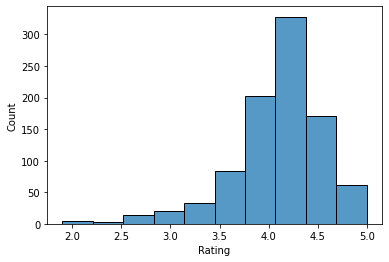

In [6]:
sns.histplot(swiggy['Rating'],bins=10)

**Information**
*   1 star - Poor
*   2 star - Average
*   3 star - Good
*   4 star - Very Good
*   5 star - Excellent

**Observation**

*   80% of the restaurants have ratings between 3.5 and 4.5 stars, which means that the majority of the restaurants are consistently providing amazing quality of food. 

*   The highest rating is 5.0 star while the lowest rating given is 1.9 star.


# **Distribution of Delivery Minutes**

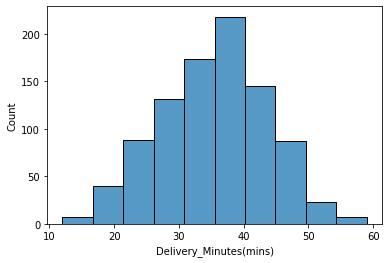

In [7]:
sns.histplot(swiggy['Delivery_Minutes(mins)'],bins=10)

**Observation**

*   The standard food delivery time taken should be between 30 to 35 minutes but only 48% of the restaurants are able to delivery food within 35 minutes.


# **Distribution of Price**

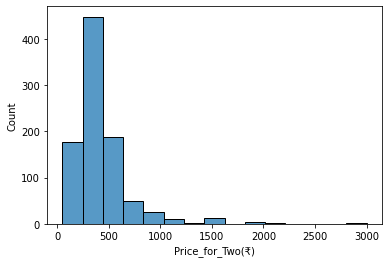

In [8]:
sns.histplot(swiggy['Price_for_Two(₹)'],bins=15)

**Observation**

*   Out of Total Restuarants 82% of them offer food within affordable price range.

*   Minimum price is ₹50 and Maximum price goes upto ₹3000.




# **Analyse the Relation between Approx Price for two vs Rating**

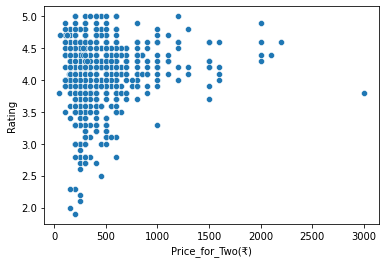

In [9]:
sns.scatterplot(data=swiggy,x='Price_for_Two(₹)',y='Rating')

**Observation**

*   From this Scatter Plot, we can see that the majority of the restaurants not only fall into the affordable price range but also has an excellent rating at the same time.

*   We can also say that it is just a myth that only expensive restaurants serves good food.



# **Top 10 Affordable High Rated Restaurants**

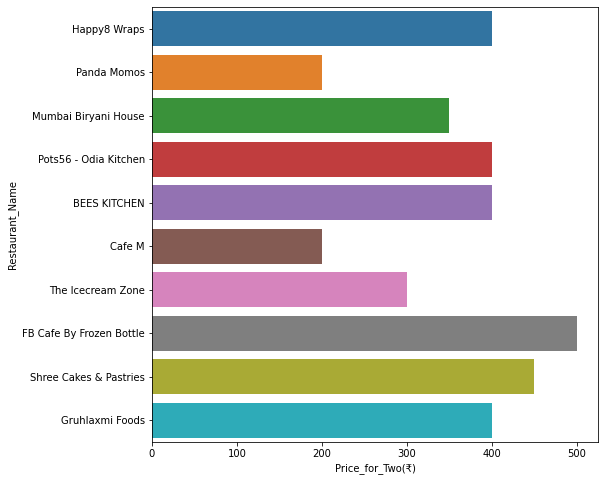

In [10]:
affordable_restaurants = swiggy.loc[(swiggy['Price_for_Two(₹)']<=500) & (swiggy['Rating']>=4.0)].sort_values('Rating',axis=0,ascending=False).head(10)
plt.figure(figsize = (8,8))
sns.barplot(data=affordable_restaurants,x='Price_for_Two(₹)',y='Restaurant_Name')

# **Top 10 Expensive High Rated Restaurants**

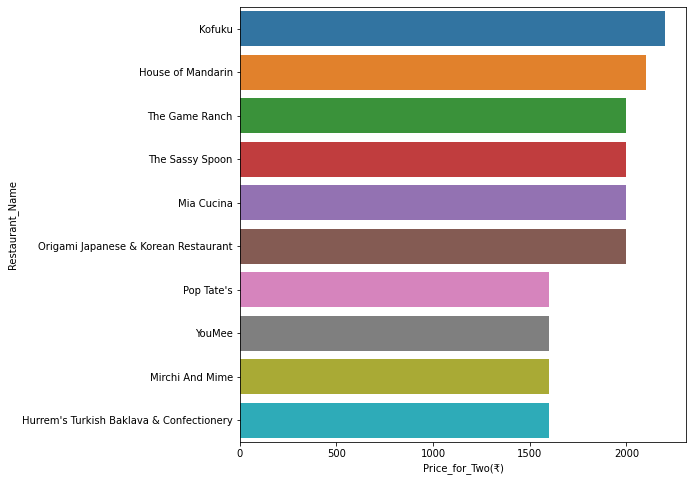

In [11]:
expensive_restaurants = swiggy.loc[swiggy['Rating']>=4.0].sort_values('Price_for_Two(₹)',axis=0,ascending=False).head(10)
plt.figure(figsize = (8,8))
sns.barplot(data=expensive_restaurants,x='Price_for_Two(₹)',y='Restaurant_Name')

# **Top 10 Most Preferred Cuisine**

In [12]:
freq_dict = {}

for i in swiggy['Cuisine']:
    for j in i.split(', '):
        if j in freq_dict:
            freq_dict[j] = freq_dict[j] + 1
        else:
            freq_dict[j] = 1


Cuisine = sorted(freq_dict.items(),key=lambda x:x[1])
df = pd.DataFrame(Cuisine,columns=['Cuisine','Count'])
print(df)

         Cuisine  Count
0         Sindhi      1
1        Persian      1
2     Vietnamese      1
3         Awadhi      1
4          Oriya      1
..           ...    ...
78     Beverages    206
79        Indian    230
80      Desserts    236
81  North Indian    239
82       Chinese    306

[83 rows x 2 columns]


In [13]:
Top_10_Cuisine = df.tail(10)
print(Top_10_Cuisine)

         Cuisine  Count
73       Mughlai     83
74        Pizzas     86
75     Fast Food     90
76       Biryani    126
77        Snacks    156
78     Beverages    206
79        Indian    230
80      Desserts    236
81  North Indian    239
82       Chinese    306


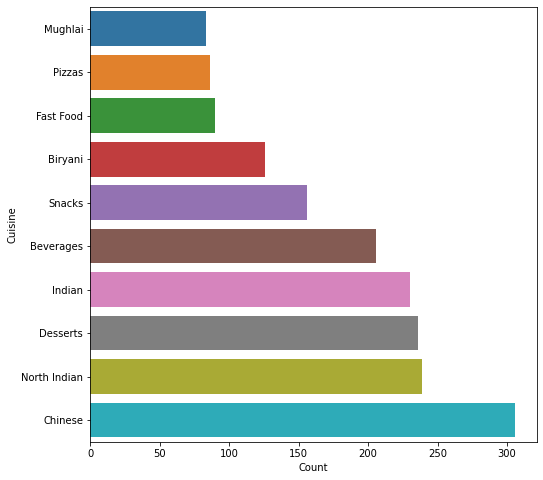

In [14]:
plt.figure(figsize = (8,8))
sns.barplot(data=Top_10_Cuisine,x='Count',y='Cuisine')

# **WordCloud Representation for Cuisines**

In [15]:
print(df)

         Cuisine  Count
0         Sindhi      1
1        Persian      1
2     Vietnamese      1
3         Awadhi      1
4          Oriya      1
..           ...    ...
78     Beverages    206
79        Indian    230
80      Desserts    236
81  North Indian    239
82       Chinese    306

[83 rows x 2 columns]


In [16]:
from wordcloud import WordCloud

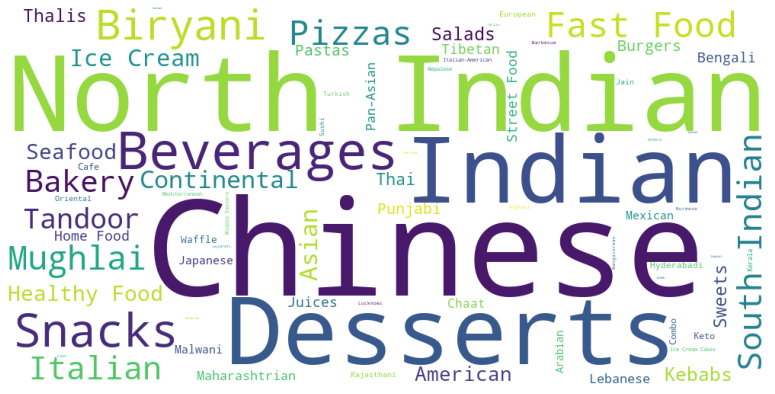

In [17]:
wordcloud = WordCloud(width = 1000, height = 500,background_color = 'white').generate_from_frequencies(freq_dict)
plt.figure(figsize = (22, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()